In [26]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import joblib

from sklearn.metrics import roc_curve, RocCurveDisplay, roc_auc_score, \
                            auc, confusion_matrix, accuracy_score, \
                            classification_report

from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.preprocessing import Normalizer, StandardScaler, MinMaxScaler

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import RidgeClassifier, LinearRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

from sklearn.pipeline import Pipeline
pd.set_option('display.float_format', '{:.2f}'.format)

In [2]:
modelo_cluster = joblib.load('../../../models/knn_pipeline_foliattiGeneral_v0.pkl')

In [3]:
# ['AVG_BET','INITIAL_AMOUNT', 'GAMES_PLAYED_TOTAL', 'GAMES_WON_TOTAL', 'Rango_Edad_le']]

In [4]:
df_data_general = pd.read_csv('../../../data/data-estancia.csv')

In [5]:
X = df_data_general[['avg_bet_avg', 'initial_amount_avg', 'games_played_total_avg', 'games_won_total_avg', 'Rango_Edad_le']]

In [6]:
X = X.rename(columns={'avg_bet_avg': 'AVG_BET', 
                  'initial_amount_avg': 'INITIAL_AMOUNT',
                  'games_played_total_avg': 'GAMES_PLAYED_TOTAL',
                  'games_won_total_avg': 'GAMES_WON_TOTAL',
                  })

In [7]:
cluster = modelo_cluster.predict(X)

In [8]:
df_data_general['Cluster'] = cluster

In [9]:
df_data_general['NET_SPEND'] = df_data_general['final_amount_avg'] - df_data_general['initial_amount_avg']

In [10]:
df_data_general['time_on_device_min'] =  df_data_general['time_on_device_sec_avg'] / 60

In [11]:
df_data_general = df_data_general[df_data_general['stay_minutes'] < 1000]
df_data_general = df_data_general[df_data_general['initial_amount_avg'] < 40000]
df_data_general = df_data_general[df_data_general['bet_total_avg'] < 300000]
df_data_general = df_data_general[df_data_general['stay_minutes'] < 400]

In [12]:
df_data_general['stay_minutes'].describe()

count   54018.00
mean      156.65
std        94.45
min         0.00
25%        83.00
50%       144.00
75%       220.00
max       399.00
Name: stay_minutes, dtype: float64

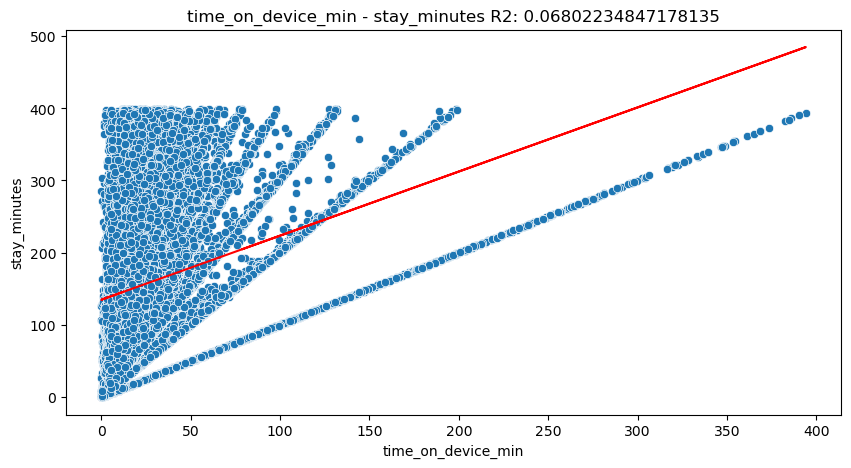

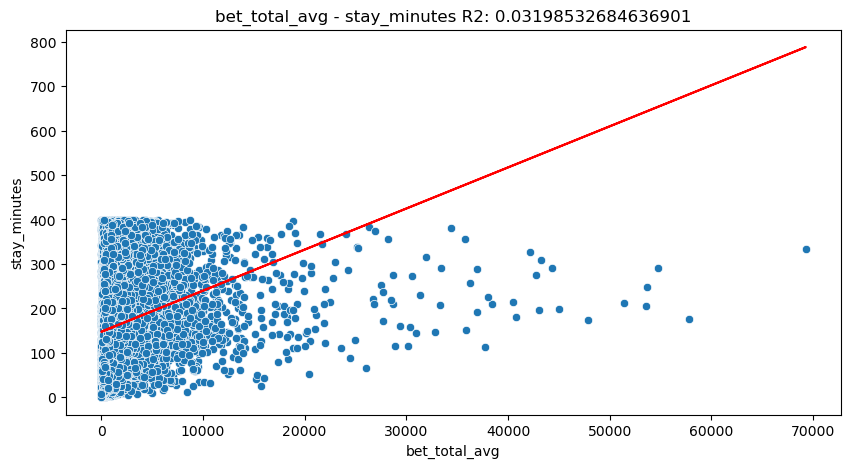

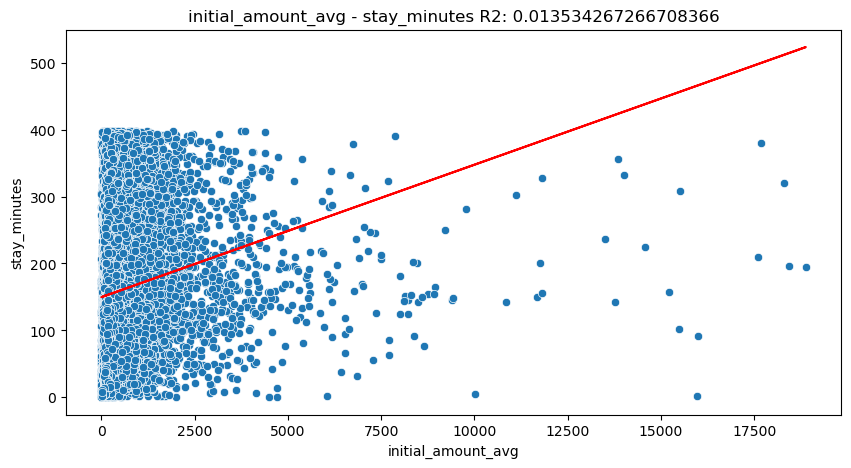

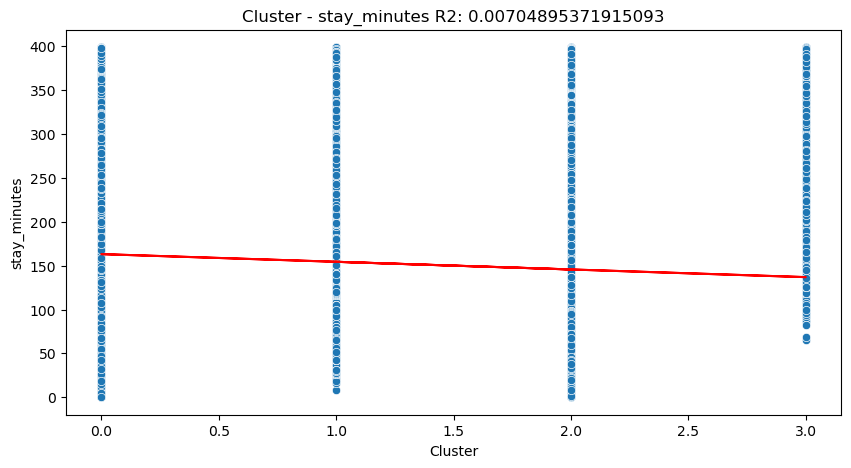

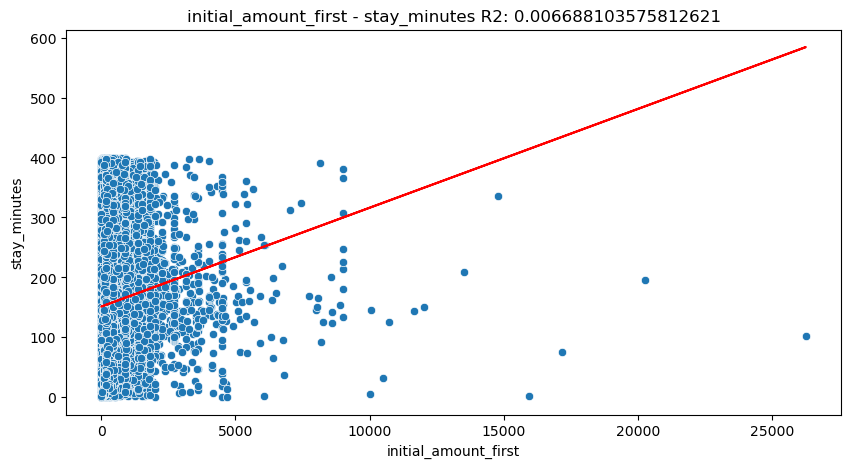

In [13]:
features = ['time_on_device_min', 'bet_total_avg', 'initial_amount_avg', 'Cluster', 'initial_amount_first']

for feature in features:
    plt.figure(figsize=(10,5))
    lr = LinearRegression()
    lr.fit(df_data_general[[feature]], df_data_general['stay_minutes'])
    y_pred = lr.predict(df_data_general[[feature]])
    sns.scatterplot(x=df_data_general[feature], y=df_data_general['stay_minutes'])
    plt.plot(df_data_general[feature], y_pred, color='red')
    r2 = r2_score(df_data_general['stay_minutes'], y_pred)
    plt.title(f"{feature} - stay_minutes R2: {r2}")

In [14]:
df_data_general.corr(numeric_only=True)

,Unnamed: 0,stay_minutes,avg_bet_avg,bet_total_avg,initial_amount_avg,initial_promo_amount_avg,final_amount_avg,final_promo_amount_avg,win_total_avg,games_played_total_avg,games_won_total_avg,time_on_device_sec_avg,initial_amount_first,Edad,Rango_Edad_le,Cluster,NET_SPEND,time_on_device_min
Unnamed: 0,1.00,0.00,0.05,0.05,0.02,-0.00,0.02,-0.00,-0.00,-0.00,-0.00,-0.01,0.02,0.01,0.00,-0.00,0.00,-0.01
stay_minutes,0.00,1.00,0.02,0.18,0.12,0.00,0.09,0.00,0.00,0.01,0.01,0.26,0.08,0.20,0.20,-0.08,0.02,0.26
avg_bet_avg,0.05,0.02,1.00,0.49,0.49,0.00,0.31,0.00,0.00,-0.00,-0.00,-0.06,0.40,-0.08,-0.09,0.08,-0.03,-0.06
bet_total_avg,0.05,0.18,0.49,1.00,0.41,-0.00,0.39,-0.00,-0.01,0.00,0.00,0.47,0.35,-0.01,-0.02,0.17,0.16,0.47
initial_amount_avg,0.02,0.12,0.49,0.41,1.00,-0.00,0.73,-0.00,0.00,-0.00,-0.00,0.05,0.75,0.02,0.02,-0.01,0.06,0.05
initial_promo_amount_avg,-0.00,0.00,0.00,-0.00,-0.00,1.00,0.00,0.99,0.00,-0.00,-0.00,-0.00,-0.00,-0.01,-0.01,0.01,0.00,-0.00
final_amount_avg,0.02,0.09,0.31,0.39,0.73,0.00,1.00,0.00,0.01,0.00,-0.00,0.11,0.47,0.02,0.03,-0.00,0.73,0.11
final_promo_amount_avg,-0.00,0.00,0.00,-0.00,-0.00,0.99,0.00,1.00,0.00,-0.00,-0.00,-0.00,-0.00,-0.01,-0.01,0.01,0.00,-0.00
win_total_avg,-0.00,0.00,0.00,-0.01,0.00,0.00,0.01,0.00,1.00,-0.03,-0.03,-0.00,-0.00,0.00,0.00,-0.00,0.02,-0.00
games_played_total_avg,-0.00,0.01,-0.00,0.00,-0.00,-0.00,0.00,-0.00,-0.03,1.00,1.00,0.01,-0.00,-0.00,-0.00,0.02,0.00,0.01


In [18]:
df_data_general.corr(numeric_only=True, method='spearman')

,Unnamed: 0,stay_minutes,avg_bet_avg,bet_total_avg,initial_amount_avg,initial_promo_amount_avg,final_amount_avg,final_promo_amount_avg,win_total_avg,games_played_total_avg,games_won_total_avg,time_on_device_sec_avg,initial_amount_first,Edad,Rango_Edad_le,Cluster,NET_SPEND,time_on_device_min,TIME_ON_DEVICE_MIN
Unnamed: 0,1.00,0.01,0.07,0.05,0.03,-0.00,0.02,-0.00,0.04,0.00,0.00,0.00,0.04,0.02,0.01,0.00,-0.02,0.00,0.00
stay_minutes,0.01,1.00,0.04,0.35,0.24,0.00,0.28,0.00,0.37,0.39,0.39,0.39,0.15,0.20,0.19,-0.08,0.06,0.39,0.39
avg_bet_avg,0.07,0.04,1.00,0.50,0.57,0.01,0.27,0.01,0.44,-0.15,-0.13,-0.16,0.50,-0.11,-0.11,0.03,-0.25,-0.16,-0.16
bet_total_avg,0.05,0.35,0.50,1.00,0.59,-0.00,0.29,-0.00,0.95,0.70,0.69,0.62,0.48,0.02,0.01,0.16,-0.24,0.62,0.62
initial_amount_avg,0.03,0.24,0.57,0.59,1.00,0.00,0.66,0.00,0.56,0.21,0.21,0.17,0.79,0.07,0.07,0.00,-0.13,0.17,0.17
initial_promo_amount_avg,-0.00,0.00,0.01,-0.00,0.00,1.00,0.00,1.00,-0.00,-0.01,-0.00,-0.01,-0.00,-0.01,-0.01,0.01,0.00,-0.01,-0.01
final_amount_avg,0.02,0.28,0.27,0.29,0.66,0.00,1.00,0.00,0.39,0.10,0.11,0.12,0.46,0.13,0.13,-0.06,0.52,0.12,0.12
final_promo_amount_avg,-0.00,0.00,0.01,-0.00,0.00,1.00,0.00,1.00,-0.00,-0.01,-0.00,-0.01,-0.00,-0.01,-0.01,0.01,0.00,-0.01,-0.01
win_total_avg,0.04,0.37,0.44,0.95,0.56,-0.00,0.39,-0.00,1.00,0.69,0.68,0.64,0.42,0.04,0.03,0.14,-0.05,0.64,0.64
games_played_total_avg,0.00,0.39,-0.15,0.70,0.21,-0.01,0.10,-0.01,0.69,1.00,0.95,0.90,0.16,0.11,0.11,0.14,-0.08,0.90,0.90


In [15]:
df_data_general['TIME_ON_DEVICE_MIN'] = df_data_general['time_on_device_sec_avg'] / 60

In [ ]:
df_data_general = df_data_general[df_data_general['TIME_ON_DEVICE_MIN'] < 600 ]

In [ ]:
df_data_general['WIN_TOTAL'].describe()

count     226731.00
mean         -20.61
std        33906.43
min     -9998594.00
25%           39.00
50%          176.75
75%          643.02
max       461502.00
Name: WIN_TOTAL, dtype: float64

In [27]:
features = ['initial_amount_avg','avg_bet_avg','Cluster', 'TIME_ON_DEVICE_MIN', 'bet_total_avg', 'win_total_avg', 'games_won_total_avg']

X = df_data_general[features]
poly_transformer = PolynomialFeatures(degree=2)
X_poly = poly_transformer.fit_transform(X)

y = df_data_general['stay_minutes']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

# Modelo
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Predicción
y_pred = model.predict(X_test)

print("MAE:", mean_absolute_error(y_test, y_pred))
print("R2:", r2_score(y_test, y_pred))

MAE: 63.261937446080026
R2: 0.29698830937922693


In [23]:
std_scaler = StandardScaler()
pipe = Pipeline([
        ('scaler', std_scaler),
        ('reg', RandomForestRegressor())
    ])

pipe.fit(X_train, y_train)

y_hat = pipe.predict(X_test)

print("MAE:", mean_absolute_error(y_test, y_hat))
print("R2:", r2_score(y_test, y_hat))

MAE: 63.63180356318292
R2: 0.283172524392309


In [ ]:
# joblib.dump(pipe, '../../../models/win_total_pipeline_regressor_foliattiGeneral_v1.pkl')

['../../../models/win_total_pipeline_regressor_foliattiGeneral_v1.pkl']

<Axes: xlabel='stay_minutes'>

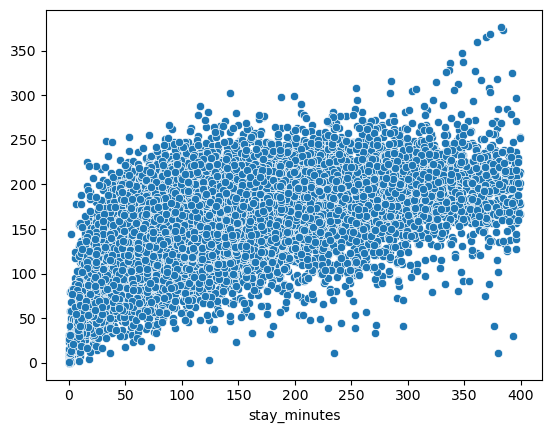

In [28]:
sns.scatterplot(x=y_test, y=y_pred)